In [ ]:
Load and Inspect the Data

In [6]:
import pandas as pd


file_path = r"C:\Users\Komail AL-Basri\Desktop\Data_Science\project\archive\Car_sales.csv"
car_sales_data = pd.read_csv(file_path)


print(car_sales_data.head())
print(car_sales_data.info())


  Manufacturer    Model  Sales_in_thousands  __year_resale_value Vehicle_type  \
0        Acura  Integra              16.919               16.360    Passenger   
1        Acura       TL              39.384               19.875    Passenger   
2        Acura       CL              14.114               18.225    Passenger   
3        Acura       RL               8.588               29.725    Passenger   
4         Audi       A4              20.397               22.255    Passenger   

   Price_in_thousands  Engine_size  Horsepower  Wheelbase  Width  Length  \
0               21.50          1.8       140.0      101.2   67.3   172.4   
1               28.40          3.2       225.0      108.1   70.3   192.9   
2                 NaN          3.2       225.0      106.9   70.6   192.0   
3               42.00          3.5       210.0      114.6   71.4   196.6   
4               23.99          1.8       150.0      102.6   68.2   178.0   

   Curb_weight  Fuel_capacity  Fuel_efficiency Latest_La

In [ ]:
Handle Missing Data

In [10]:
for column in car_sales_data.select_dtypes(include=['float64', 'int64']).columns:
    car_sales_data[column] = car_sales_data[column].fillna(car_sales_data[column].median())

for column in car_sales_data.select_dtypes(include=['object']).columns:
    car_sales_data[column] = car_sales_data[column].fillna(car_sales_data[column].mode()[0])

print(car_sales_data.isnull().sum())


Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64


In [ ]:
Handle Outliers

In [12]:
Q1 = car_sales_data['Price_in_thousands'].quantile(0.25)
Q3 = car_sales_data['Price_in_thousands'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

car_sales_data = car_sales_data[(car_sales_data['Price_in_thousands'] >= lower_bound) &
                                (car_sales_data['Price_in_thousands'] <= upper_bound)]

print("Data shape after outlier removal:", car_sales_data.shape)


Data shape after outlier removal: (148, 16)


In [ ]:
Descriptive Statistics

In [14]:
print(car_sales_data.describe())


       Sales_in_thousands  __year_resale_value  Price_in_thousands  \
count          148.000000           148.000000          148.000000   
mean            55.937270            15.499696           24.740135   
std             68.978728             6.262461            9.608345   
min              0.110000             5.160000            9.235000   
25%             15.824000            12.338750           17.793250   
50%             32.302500            14.180000           22.518500   
75%             70.466750            17.375000           29.340500   
max            540.561000            41.450000           51.728000   

       Engine_size  Horsepower   Wheelbase       Width      Length  \
count   148.000000  148.000000  148.000000  148.000000  148.000000   
mean      2.962838  178.557432  107.581757   71.049662  187.321622   
std       0.937451   47.490727    7.422186    3.475451   13.514928   
min       1.000000   55.000000   93.100000   62.600000  149.400000   
25%       2.275000 

In [ ]:
Identify Outliers (Using IQR for Price)

In [16]:
Q1 = car_sales_data['Price_in_thousands'].quantile(0.25)
Q3 = car_sales_data['Price_in_thousands'].quantile(0.75)
IQR = Q3 - Q1
outliers = car_sales_data[(car_sales_data['Price_in_thousands'] < (Q1 - 1.5 * IQR)) | (car_sales_data['Price_in_thousands'] > (Q3 + 1.5 * IQR))]
print("Number of outliers:", outliers.shape[0])


Number of outliers: 2


In [ ]:
Encode Categorical Variables

In [18]:

car_sales_data_encoded = pd.get_dummies(car_sales_data, drop_first=True)
print(car_sales_data_encoded.head())


X = car_sales_data_encoded.drop(columns=['Price_in_thousands'])
y = car_sales_data_encoded['Price_in_thousands']


   Sales_in_thousands  __year_resale_value  Price_in_thousands  Engine_size  \
0              16.919               16.360              21.500          1.8   
1              39.384               19.875              28.400          3.2   
2              14.114               18.225              22.799          3.2   
3               8.588               29.725              42.000          3.5   
4              20.397               22.255              23.990          1.8   

   Horsepower  Wheelbase  Width  Length  Curb_weight  Fuel_capacity  ...  \
0       140.0      101.2   67.3   172.4        2.639           13.2  ...   
1       225.0      108.1   70.3   192.9        3.517           17.2  ...   
2       225.0      106.9   70.6   192.0        3.470           17.2  ...   
3       210.0      114.6   71.4   196.6        3.850           18.0  ...   
4       150.0      102.6   68.2   178.0        2.998           16.4  ...   

   Latest_Launch_9/1/2011  Latest_Launch_9/10/2012  Latest_Launch_9/

In [ ]:
Normalize Numeric Features (Mileage and Price)

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
car_sales_data[['Price_in_thousands', 'Fuel_efficiency']] = scaler.fit_transform(car_sales_data[['Price_in_thousands', 'Fuel_efficiency']])

print(car_sales_data[['Price_in_thousands', 'Fuel_efficiency']].head())


   Price_in_thousands  Fuel_efficiency
0            0.288636         0.433333
1            0.451015         0.333333
2            0.319206         0.366667
3            0.771068         0.233333
4            0.347234         0.400000


In [ ]:
 Split Data into Train and Test Sets

In [22]:
from sklearn.model_selection import train_test_split


X = car_sales_data_encoded.drop(columns=['Price_in_thousands'])
y = car_sales_data_encoded['Price_in_thousands']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (118, 309)
Testing data shape: (30, 309)


In [ ]:
Histogram of Car Prices

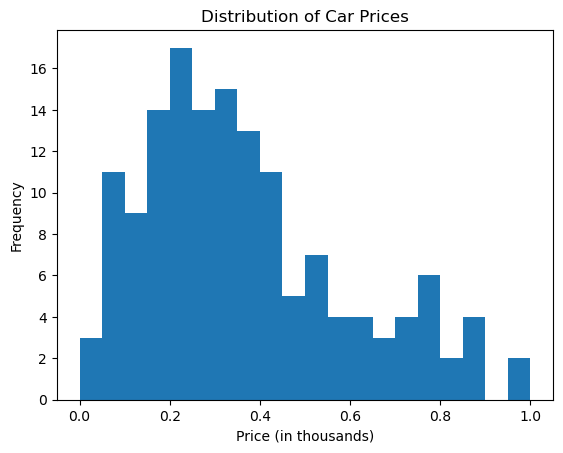

In [24]:
import matplotlib.pyplot as plt

plt.hist(car_sales_data['Price_in_thousands'], bins=20)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (in thousands)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
Scatter Plot of Mileage vs. Price

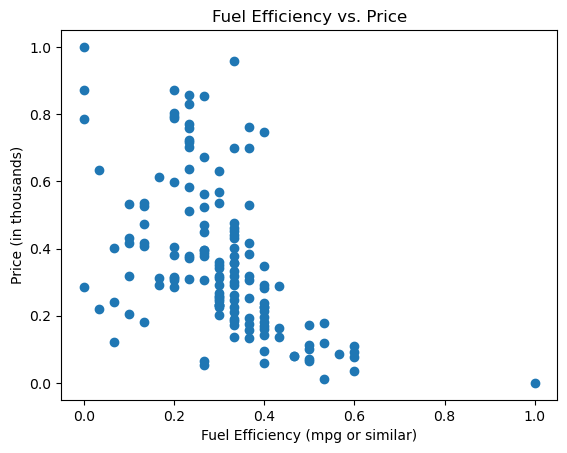

In [26]:
plt.scatter(car_sales_data['Fuel_efficiency'], car_sales_data['Price_in_thousands'])
plt.title('Fuel Efficiency vs. Price')
plt.xlabel('Fuel Efficiency (mpg or similar)')
plt.ylabel('Price (in thousands)')
plt.show()


In [ ]:
Box Plot of Prices by Car Make

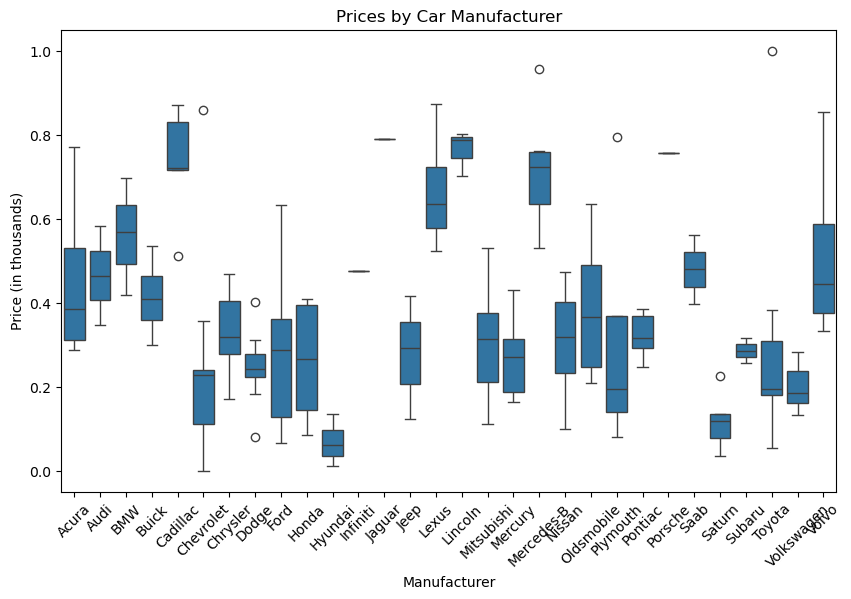

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Manufacturer', y='Price_in_thousands', data=car_sales_data)
plt.title('Prices by Car Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Price (in thousands)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
Correlation Heatmap

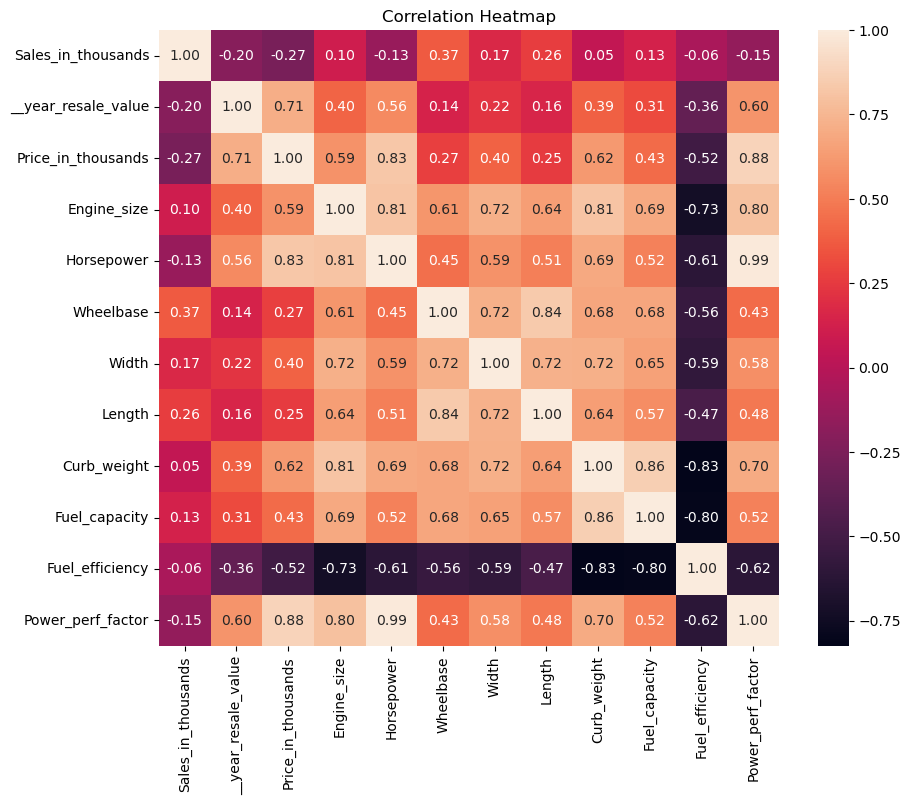

In [30]:
plt.figure(figsize=(10, 8))
sns.heatmap(car_sales_data.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
T-test (Comparing Prices Between Two Makes)

In [32]:
make1_prices = car_sales_data[car_sales_data['Manufacturer'] == 'Toyota']['Price_in_thousands']
make2_prices = car_sales_data[car_sales_data['Manufacturer'] == 'Ford']['Price_in_thousands']

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(make1_prices, make2_prices, nan_policy='omit')
print("T-test results: t-statistic =", t_stat, ", p-value =", p_value)


T-test results: t-statistic = 0.20792494474140336 , p-value = 0.8376220222504163


In [ ]:
Split Data into Train and Test Sets

In [34]:
from sklearn.model_selection import train_test_split


X = car_sales_data_encoded.drop(columns=['Price_in_thousands'])
y = car_sales_data_encoded['Price_in_thousands']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (118, 309)
Testing data shape: (30, 309)


In [ ]:
Train Machine Learning Models

In [36]:

X_train = X_train.fillna(X_train.median())  # Replace NaN with median values
X_test = X_test.fillna(X_test.median())


from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print(f"R²: {r2_score(y_test, predictions):.4f}")
    print(f"MSE: {mean_squared_error(y_test, predictions):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, predictions):.4f}")
    print("-" * 30)

evaluate_model(y_test, lr_predictions, "Linear Regression")


Model: Linear Regression
R²: 0.9333
MSE: 5.4836
MAE: 1.7379
------------------------------


In [ ]:
Evaluate Models

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)


dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)


rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


def evaluate_model(y_test, predictions, model_name):
    print(f"Model: {model_name}")
    print(f"R²: {r2_score(y_test, predictions):.4f}")
    print(f"MSE: {mean_squared_error(y_test, predictions):.4f}")
    print(f"MAE: {mean_absolute_error(y_test, predictions):.4f}")
    print("-" * 30)


evaluate_model(y_test, lr_predictions, "Linear Regression")
evaluate_model(y_test, dt_predictions, "Decision Tree")
evaluate_model(y_test, rf_predictions, "Random Forest")


Model: Linear Regression
R²: 0.9333
MSE: 5.4836
MAE: 1.7379
------------------------------
Model: Decision Tree
R²: 0.6964
MSE: 24.9618
MAE: 3.5619
------------------------------
Model: Random Forest
R²: 0.8299
MSE: 13.9840
MAE: 2.7793
------------------------------


In [ ]:
Feature Importance (Random Forest)

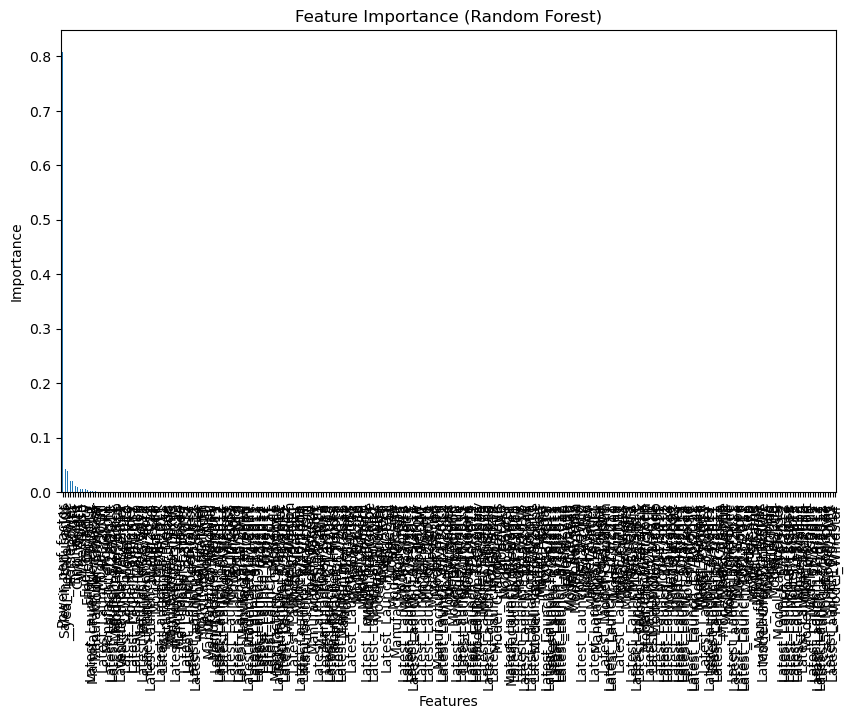

In [40]:
import matplotlib.pyplot as plt
import pandas as pd


feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [ ]:
Visualization of Predictions

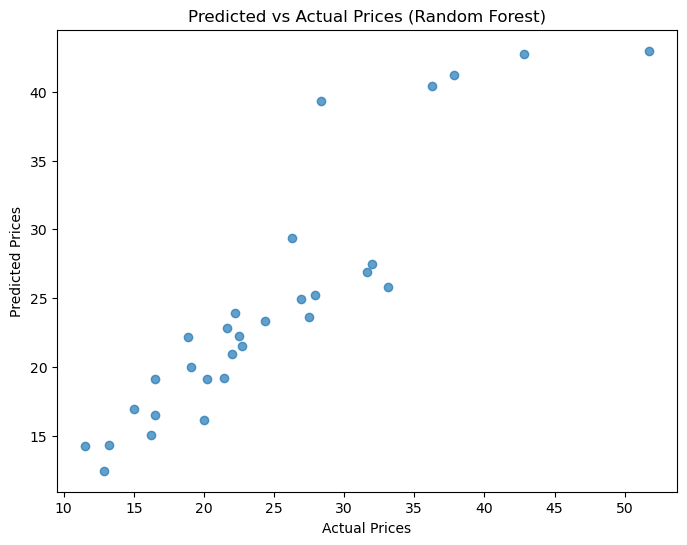

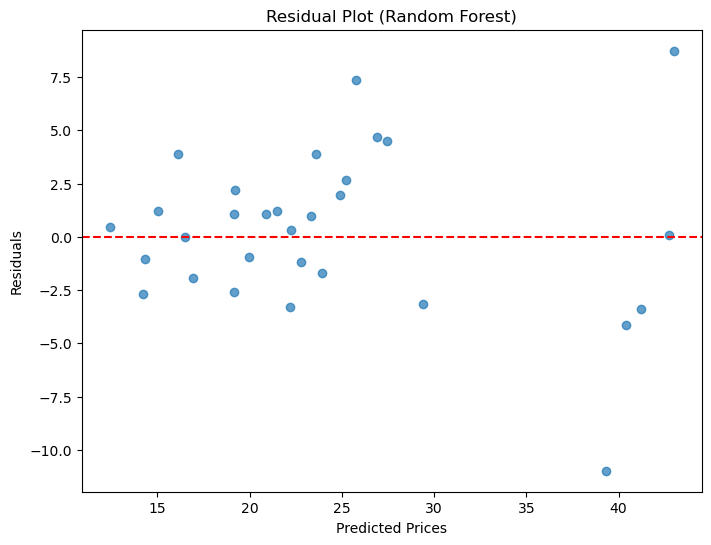

In [42]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_predictions, alpha=0.7)
plt.title('Predicted vs Actual Prices (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

residuals = y_test - rf_predictions
plt.figure(figsize=(8, 6))
plt.scatter(rf_predictions, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot (Random Forest)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()


In [ ]:
Model Comparison

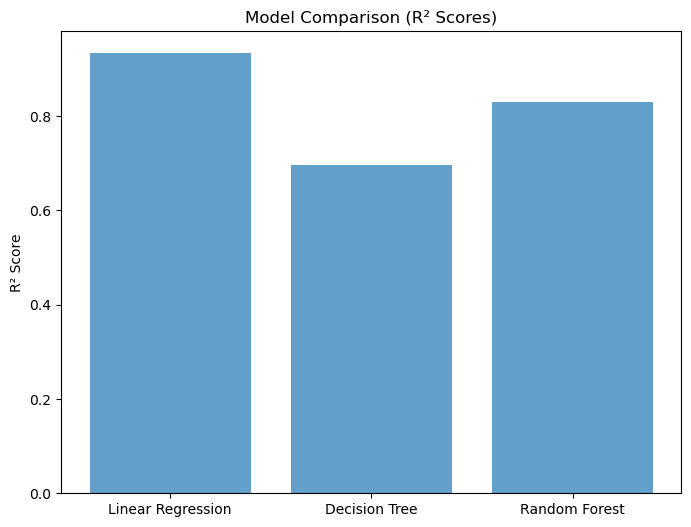

In [44]:

models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [r2_score(y_test, lr_predictions), 
             r2_score(y_test, dt_predictions), 
             r2_score(y_test, rf_predictions)]

plt.figure(figsize=(8, 6))
plt.bar(models, r2_scores, alpha=0.7)
plt.title('Model Comparison (R² Scores)')
plt.ylabel('R² Score')
plt.show()


In [ ]:
Hypothesis 1: Higher Mileage Reduces Car Prices

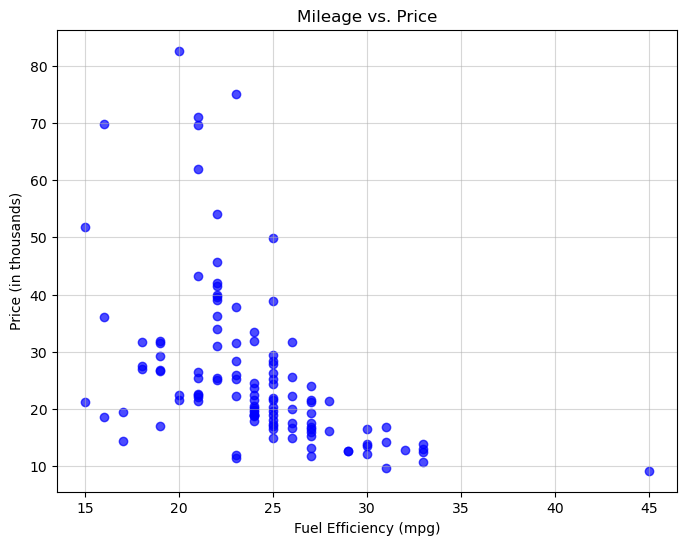

Correlation: -0.4794
P-value: 0.0000
Conclusion: There is a significant relationship between mileage and price.


In [90]:

plt.figure(figsize=(8, 6))
plt.scatter(car_sales_data['Fuel_efficiency'], car_sales_data['Price_in_thousands'], alpha=0.7, color='blue')
plt.title('Mileage vs. Price')
plt.xlabel('Fuel Efficiency (mpg)')
plt.ylabel('Price (in thousands)')
plt.grid(alpha=0.5)
plt.show()


correlation, p_value = pearsonr(car_sales_data['Fuel_efficiency'], car_sales_data['Price_in_thousands'])
print(f"Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")


if p_value < 0.05:
    print("Conclusion: There is a significant relationship between mileage and price.")
else:
    print("Conclusion: No significant relationship between mileage and price.")


In [ ]:
Hypothesis 2: Prices Vary by Manufacturer

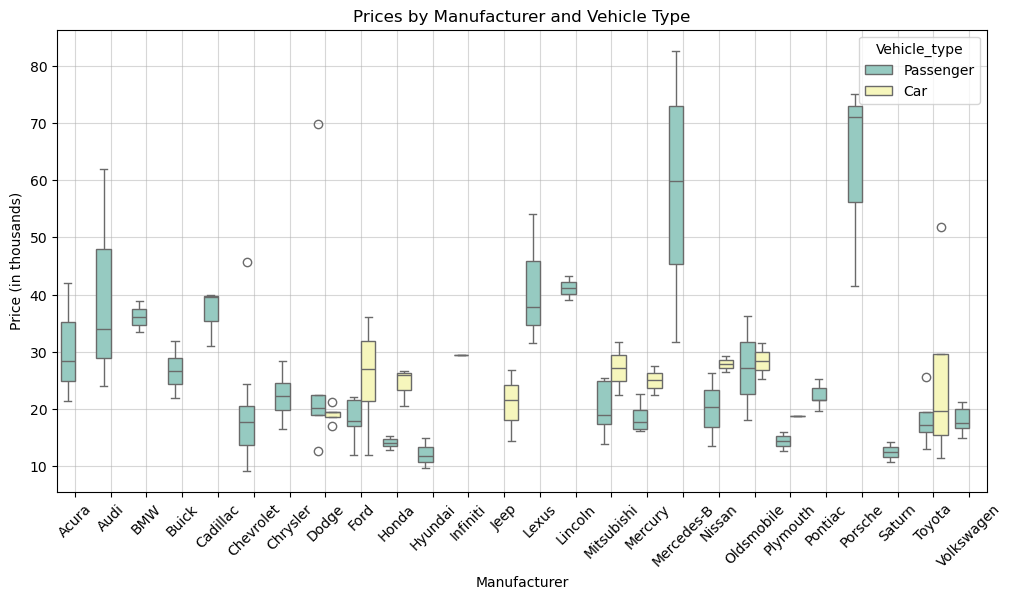

In [92]:

plt.figure(figsize=(12, 6))
sns.boxplot(x='Manufacturer', y='Price_in_thousands', hue='Vehicle_type', data=car_sales_data, palette='Set3')
plt.title('Prices by Manufacturer and Vehicle Type')
plt.xlabel('Manufacturer')
plt.ylabel('Price (in thousands)')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.show()


In [ ]:
Hypothesis 3: Newer Cars Are More Expensive

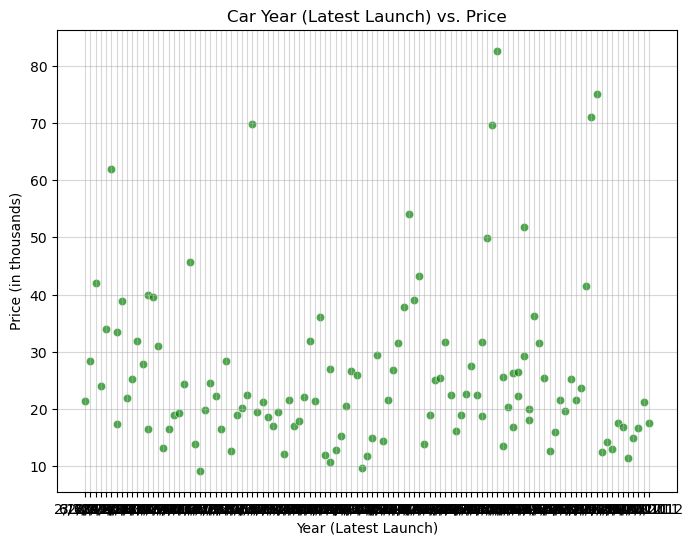

Correlation: -0.0270
P-value: 0.7717
Conclusion: No significant relationship between year and price.


In [94]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Latest_Launch', y='Price_in_thousands', data=car_sales_data, alpha=0.7, color='green')
plt.title('Car Year (Latest Launch) vs. Price')
plt.xlabel('Year (Latest Launch)')
plt.ylabel('Price (in thousands)')
plt.grid(alpha=0.5)
plt.show()


car_sales_data['Year'] = pd.to_datetime(car_sales_data['Latest_Launch']).dt.year


correlation, p_value = pearsonr(car_sales_data['Year'], car_sales_data['Price_in_thousands'])
print(f"Correlation: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")


if p_value < 0.05:
    print("Conclusion: Newer cars are significantly more expensive.")
else:
    print("Conclusion: No significant relationship between year and price.")


In [ ]:
Hypothesis 4: Comparing Prices Between Two Manufacturers

In [96]:

toyota_prices = car_sales_data[car_sales_data['Manufacturer'] == 'Toyota']['Price_in_thousands']
ford_prices = car_sales_data[car_sales_data['Manufacturer'] == 'Ford']['Price_in_thousands']


t_stat, p_value = ttest_ind(toyota_prices, ford_prices, nan_policy='omit')
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")


if p_value < 0.05:
    print("Conclusion: Toyota and Ford have significantly different prices.")
else:
    print("Conclusion: No significant difference in prices between Toyota and Ford.")


T-statistic: 0.0029
P-value: 0.9977
Conclusion: No significant difference in prices between Toyota and Ford.
